# **Carlini and Wagner** Attack and Binary Input Detector Using CIFAR10




### **Carlini and Wagner (C&W) Attack - Overview**

The **Carlini and Wagner (C&W)** attack, introduced by **Nicholas Carlini** and **David Wagner** in 2017, is one of the most powerful and effective methods for generating adversarial examples. It is designed to be more effective and difficult to defend against compared to other adversarial attacks like **FGSM** and **PGD**.

The C&W attack specifically addresses some of the limitations of earlier methods by framing the generation of adversarial examples as an **optimization problem**. The attack minimizes a combination of the perturbation's magnitude and the model's loss (misclassification), while also introducing a regularization term to control the perceptibility of the adversarial perturbation.

#### **Key Concepts:**

**1. Adversarial Example:** A slightly modified version of the input that is intentionally crafted to cause a model to misclassify it.

**2. Optimization Problem:** The C&W attack formulates the creation of an adversarial example as an optimization problem, where the goal is to minimize a loss function that balances:
* The difference between the original and adversarial inputs (i.e., the perturbation magnitude).
* The model's confidence in the adversarial class (i.e., the model's misclassification).

**3. Regularization:** C&W uses regularization to ensure that the perturbation is not too large, which keeps the adversarial example visually similar to the original input.

#### **How the Carlini and Wagner Attack Works**

The C&W attack minimizes a loss function that includes three key components:

**1. The Loss for Misclassification:** Ensuring that the adversarial example is classified as the wrong class.

**2. The Perturbation Size:** Keeping the perturbation (i.e., the difference between the original and adversarial input) small.

**3. Regularization:** A term that controls the magnitude of the perturbation to ensure the adversarial example is visually similar to the original.

#### **Objective Function**

The C&W attack solves an optimization problem that minimizes the following objective function:
$$L(x_{adv},x,y)=max(0,f(x_{adv})_{y_{target}}−f(x_{adv})y+δ)+λ∥x_{adv}−x∥_{p}$$

Where:

* $x_{adv}$​ is the adversarial example.
* $x$ is the original input.
* $y$ is the true label of the input $x$.
* $y_{target}$​ is the target class that we want the adversarial example to be classified as. If we're performing a targeted attack, we set ytargetytarget​ to be a specific class (different from the original class), otherwise, it will simply aim to misclassify the input.
* $f(x_{adv})_{y}$​ and $f(x_{adv})_{y_{target}}$​​ represent the logits (raw output scores) of the model for the true label $y$ and the target label $y_{target}$​, respectively.
* $δ$ is a small constant that makes sure that the misclassification loss doesn't vanish.
* $λ$ is a regularization hyperparameter that controls the tradeoff between the loss for misclassification and the perturbation size.
* $∥x_{adv}−x∥_{p}$​ is the pp-norm distance (usually $p=2$, i.e., the Euclidean norm), which measures the magnitude of the perturbation between the adversarial example and the original input.

#### **Detailed Breakdown of the Objective Function**

**1. Misclassification Term:**
* The term $max(0,f(x_{adv})_{y_{target}}−f(x_{adv})_{y}+δ)$ ensures that the adversarial example is classified as the target class ytargetytarget​ (for a targeted attack) or misclassified (for an untargeted attack). This is known as a margin loss.
* This term ensures that the logits for the target class are larger than the logits for the original class by at least $δ$. The value of $δ$ is small, but ensures a sufficient gap between the logits of the target class and the original class to successfully fool the model.

**2. Regularization Term:**
* The term $λ∥x_{adv}−x∥_{p}$​ controls the perturbation size. The pp-norm $∥x_{adv}−x∥_{p}$​ measures the difference between the adversarial example and the original input.
* The parameter $λ$ allows us to adjust the tradeoff between making the perturbation smaller (thus keeping the adversarial example visually similar to the original) and fooling the model.

**3. Optimization:**
* The goal is to minimize this objective function. The optimization process is performed using gradient-based methods (such as L-BFGS or Adam), iteratively adjusting $x_{adv}$​ until the model classifies the adversarial example as the target class (or misclassifies it, in the case of an untargeted attack) and the perturbation remains within the desired size.

#### **Targeted vs. Untargeted Attacks**

* **Targeted Attack**: The goal is to make the model classify the adversarial example as a specific class $ytarget$​ that is different from the true class yy. The objective function is minimized such that $f(x_{adv})_{y_{target}}$​ is greater than $f(x_{adv})y$​ by at least $δ$.

* **Untargeted Attack**: The goal is simply to cause the model to misclassify the adversarial example, regardless of which incorrect class it is classified as. In this case, the objective function is adjusted so that the adversarial example's logits for the correct class are smaller than those for any incorrect class.

#### **Steps in the Carlini and Wagner Attack**

**1. Initialize the adversarial example** $x_{adv}​$. This is usually initialized as a slightly perturbed version of the original input $x$.

**2. Iterate the optimization process:**
* Compute the gradient of the objective function with respect to $x_{adv}$​.
* Update $x_{adv}$​ to minimize the objective function, using gradient-based optimization (e.g., L-BFGS).

**3. Termination:** The optimization stops when the adversarial example satisfies the condition for misclassification (or targeted classification) and the perturbation is within the acceptable magnitude range.

#### **Strengths of C&W Attack**

* **High Success Rate:** The C&W attack is known to be very effective against a wide range of defense mechanisms, including adversarial training and defensive distillation.
* **Controllable Perturbation:** By adjusting the regularization term $λ$, C&W allows for fine-grained control over the magnitude of the perturbation. This makes it possible to generate adversarial examples that are visually indistinguishable from the original inputs.
* **Targeted and Untargeted Options:** The attack is flexible, supporting both targeted and untargeted attacks.

#### **Weaknesses of C&W Attack**

* **Computationally Expensive:** The optimization process is more computationally expensive compared to methods like FGSM and PGD, as it involves iterative optimization and requires significant computational resources, especially for large models or high-dimensional inputs (such as images).
* **Optimization Sensitivity:** The success of the attack depends on the choice of hyperparameters, particularly $λ$, $δ$, and the optimization method. Improper tuning can lead to suboptimal results.

## **Implementation**

This notebook shows the Carlini and Wagner attack implmentation using the ART library against deep learning models trained on CIFAR-10 dataset. The notebook covers the following:

* Load the required libariries
* Load the dataset and inspect the data
* Create a deep learning model
* Train and evaluate the deep learning model on the test
* Implement C&W attack using ART
* Create adversarial samples using the C&W attack
* Evaluate the deep leaarning model against the adversaarial samples
* Create a detector model to detect adversarial samples
* Train and evaluate the detector model

### Install and import required Libraries

In [1]:
# Install the Adversarial Robustness Toolbox for creating and evaluating adversarial attacks.
!pip install adversarial-robustness-toolbox

# Install VisualKeras for visualizing model architecture with layer types and connections.
!pip install visualkeras

In [2]:
# Suppress warnings to keep the output clean.
import warnings
warnings.filterwarnings('ignore')

# Import TensorFlow and other necessary libraries.
import tensorflow as tf
# (Optional) Disable eager execution for TensorFlow v1 compatibility.
# tf.compat.v1.disable_eager_execution()

import numpy as np
from matplotlib import pyplot as plt
# import pandas as pd  # Commented out: not used in this script.

# Import essential Keras components for building a CNN model.
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2

# Import tools from Adversarial Robustness Toolbox (ART).
from art.utils import load_cifar10, preprocess, to_categorical  # For loading and preparing the CIFAR-10 dataset.

# Import ART components for model wrapping, attacks, and defenses.
from art.estimators.classification import KerasClassifier          # Wraps a Keras model for ART compatibility.
from art.attacks.evasion import CarliniLInfMethod, CarliniL0Method, CarliniL2Method           # Defines an adversarial attack method.
from art.defences.detector.evasion import BinaryInputDetector      # Used for detecting adversarial examples.

2025-08-26 16:01:10.055006: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 16:01:10.066955: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756242070.082738  449441 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756242070.088017  449441 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-26 16:01:10.104004: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
# Force TensorFlow to use only the second GPU (index 1)
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[2], 'GPU')
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[2], True)

### Load MNIST dataset

In [4]:
# Load the CIFAR-10 dataset using ART's utility function.
# This function returns pre-split training and testing data along with their min/max pixel values.
(x_train, y_train), (x_test, y_test), min_, max_ = load_cifar10()

# Define the class names corresponding to CIFAR-10 labels for reference.
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

# Retrieve the minimum and maximum pixel values from the training data
# (should typically be in the range [0, 255] before normalization).
min_val = x_train.min()
max_val = x_train.max()

# Output dataset shapes and value range for verification.
x_train.shape, y_train.shape, x_test.shape, y_test.shape, min_val, max_val


((50000, 32, 32, 3),
 (50000, 10),
 (10000, 32, 32, 3),
 (10000, 10),
 np.float64(0.0),
 np.float64(1.0))

### Inspect the Data

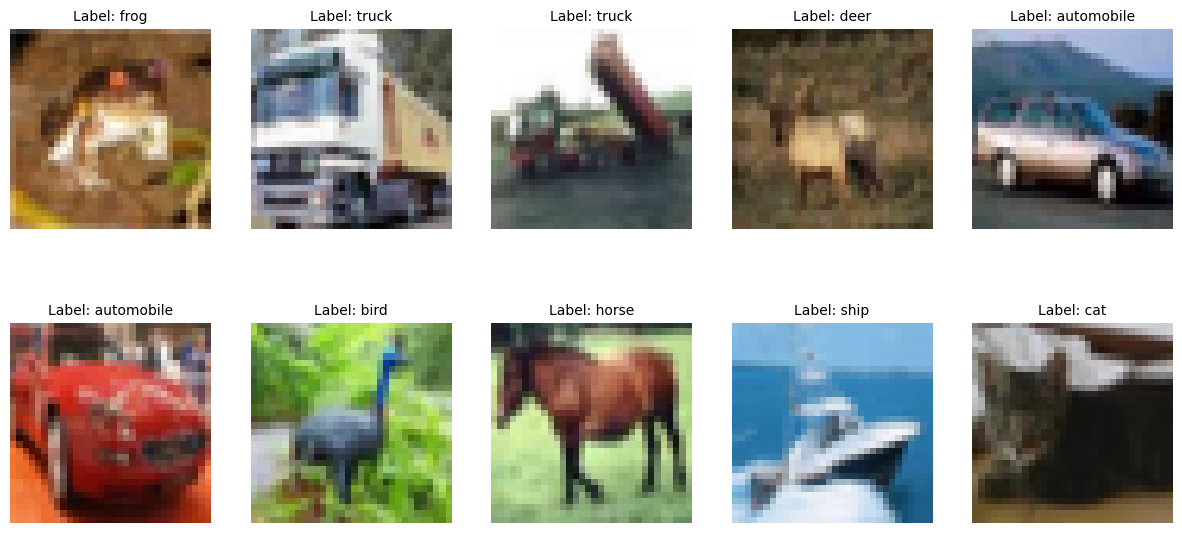

In [5]:
# Plot 10 sample images from the CIFAR-10 training set with their corresponding class labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))  # Create a 2x5 grid of subplots.
ax = ax.flatten()  # Flatten the axes array for easy iteration.

# Display the first 10 training images along with their human-readable class names.
for i, (image, label) in enumerate(zip(x_train[:10], y_train[:10])):
    ax[i].imshow(image)  # Show the image (in RGB).

    # Decode the one-hot encoded label back to its class index, then get the class name.
    ax[i].set_title(f"Label: {class_name[label.argmax()]}", fontsize=10)
    ax[i].axis('off')  # Hide axis ticks for cleaner visualization.

## **Training the Model**

### **Model Description (CIFAR-10 CNN)**

This convolutional neural network (CNN) is designed for image classification on the CIFAR-10 dataset. The architecture includes multiple convolutional blocks, each followed by regularization techniques such as dropout and batch normalization to improve performance and reduce overfitting.

* **Input Layer**: Accepts RGB images of shape (32, 32, 3).

* **Convolutional Blocks**:

  * **Block 1**: Two convolutional layers with 32 filters each, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 2**: Two convolutional layers with 64 filters, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 3**: Two convolutional layers with 128 filters, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 4**: Two convolutional layers with 256 filters, followed by max pooling, dropout (25%), and batch normalization.

* **Fully Connected Layers**:

  * Dense layer with 512 units (ReLU activation) and dropout (50%).
  * Dense layer with 64 units (ReLU activation) and dropout (50%).

* **Output Layer**: Dense layer with 10 units and softmax activation to classify the input image into one of 10 CIFAR-10 classes.

The model is compiled using the **Adam optimizer**, with **categorical cross-entropy** as the loss function and **accuracy** as the evaluation metric.


In [6]:
# Define a deeper Convolutional Neural Network (CNN) for CIFAR-10 image classification.
model = tf.keras.models.Sequential([
    # First convolutional block: two Conv2D layers followed by pooling, dropout, and batch normalization
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Fourth convolutional block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Flatten feature maps to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layers with dropout for regularization
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output layer with 10 units (one per class) and softmax activation
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

I0000 00:00:1756242074.354508  449441 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 36943 MB memory:  -> device: 2, name: Quadro RTX 8000, pci bus id: 0000:73:00.0, compute capability: 7.5


### Visualize the CNN Architecture

In [7]:
# import visualkeras
# Display a layered visual representation of the model architecture.
# 'scale_xy' controls the scaling of the diagram.
# 'legend=True' shows layer types with corresponding color codes.
# visualkeras.layered_view(model, scale_xy=10, legend=True)

### Model Summary

In [8]:
# Print a detailed summary of the model architecture,
# including layer types, output shapes, and number of parameters.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             

 Total params: 1,732,458 (6.61 MB)

 Trainable params: 1,731,498 (6.61 MB)

 Non-trainable params: 960 (3.75 KB)

### Visualize Model Architecture Diagram

In [9]:
# Generate and display a plot of the model architecture,
# showing each layer’s name and output shape.
# tf.keras.utils.plot_model(model, show_shapes=True, dpi = 75)

### Train the model.

In [10]:
# Train the model on the training data for 250 epochs.
# The history object stores training metrics and loss values.
# history = model.fit(x_train, y_train, batch_size=128, epochs = 250)

### Save/load the model

In [11]:
# Define the path where the trained model will be saved
model_path = './cifar10_cnn_model.keras'

# If you have trained your own model and want to save it, uncomment and run:
# model.save(model_path)


# Otherwise, load the pretrained model provided (e.g., from GitHub or another source).
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/cifar10_cnn_model.keras -O cifar10_cnn_model.keras
# model = tf.keras.models.load_model('cifar10_cnn_model.keras')
model = tf.keras.models.load_model('./../Models/General_Models/cifar10_cnn.keras')

# Display the model architecture summary to make sure the model has successfully been loaded.
# model.summary()

### Evaluate model accuracy on test data.

In [12]:
# Evaluate the model on the test dataset and get loss and accuracy.
loss_test, accuracy_test = model.evaluate(x_test, y_test)

# Print the test accuracy as a percentage.
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

I0000 00:00:1756242076.479927  449891 service.cc:148] XLA service 0x7a676400cac0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756242076.480029  449891 service.cc:156]   StreamExecutor device (0): Quadro RTX 8000, Compute Capability 7.5
2025-08-26 16:01:16.500089: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756242076.565416  449891 cuda_dnn.cc:529] Loaded cuDNN version 91200
2025-08-26 16:01:16.779550: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"act

 70/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8732 - loss: 0.7862

I0000 00:00:1756242077.559692  449891 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


305/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.8426

2025-08-26 16:01:18.345062: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 16:01:18.364762: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8646 - loss: 0.8665
Accuracy on test data: 86.46%


### Wrap the Keras Model with an ART Classifier

In [13]:
# Create an ART KerasClassifier to enable adversarial robustness tools.
# 'clip_values' defines the input data range for normalization and attack generation.
classifier = KerasClassifier(model=model, clip_values=(min_val, max_val))

### **Carlini and Wagner L_0 Attack**

### Overview

> class art.attacks.evasion.CarliniL0Method(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, binary_search_steps: int = 10, max_iter: int = 10, initial_const: float = 0.01, mask: Optional[ndarray] = None, warm_start: bool = True, max_halving: int = 5, max_doubling: int = 5, batch_size: int = 1, verbose: bool = True)


The L_0 distance metric is non-differentiable and therefore is ill-suited for standard gradient descent. Instead, we use an iterative algorithm that, in each iteration, identifies some features that don’t have much effect on the classifier output and then fixes those features, so their value will never be changed. The set of fixed features grows in each iteration until we have, by process of elimination, identified a minimal (but possibly not minimum) subset of features that can be modified to generate an adversarial example. In each iteration, we use our L_2 attack to identify which features are unimportant [Carlini and Wagner, 2016].*
Paper link: https://arxiv.org/abs/1608.04644


*\_\_init__(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, binary_search_steps: int = 10, max_iter: int = 10, initial_const: float = 0.01, mask: Optional[ndarray] = None, warm_start: bool = True, max_halving: int = 5, max_doubling: int = 5, batch_size: int = 1, verbose: bool = True)*

**Create a Carlini&Wagner L_0 attack instance.**

    Parameters
* classifier – A trained classifier.
* confidence (float) – Confidence of adversarial examples: a higher value produces examples that are farther away, from the original input, but classified with higher confidence as the target class.
* targeted (bool) – Should the attack target one specific class.
* learning_rate (float) – The initial learning rate for the attack algorithm. Smaller values produce better results but are slower to converge.
* binary_search_steps (int) – Number of times to adjust constant with binary search (positive value). If binary_search_steps is large, then the algorithm is not very sensitive to the value of initial_const. Note that the values gamma=0.999999 and c_upper=10e10 are hardcoded with the same values used by the authors of the method.
* max_iter (int) – The maximum number of iterations.
* initial_const (float) – The initial trade-off constant c to use to tune the relative importance of distance and confidence. If binary_search_steps is large, the initial constant is not important, as discussed in Carlini and Wagner (2016).
* mask – The initial features that can be modified by the algorithm. If not specified, the algorithm uses the full feature set.
* warm_start (bool) – Instead of starting gradient descent in each iteration from the initial image. we start the gradient descent from the solution found on the previous iteration.
* max_halving (int) – Maximum number of halving steps in the line search optimization.
* max_doubling (int) – Maximum number of doubling steps in the line search optimization.
* batch_size (int) – Size of the batch on which adversarial samples are generated.
* verbose (bool) – Show progress bars.

**generate(x: ndarray, y: Optional[ndarray] = None, \*\*kwargs) → ndarray**

Generate adversarial samples and return them in an array.

    Return type
* ndarray
    
    
    Parameters
* x (ndarray) – An array with the original inputs to be attacked.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,). If self.targeted is true, then y represents the target labels. If self.targeted is true, then y_val represents the target labels. Otherwise, the targets are the original class labels.


    Returns
* An array holding the adversarial examples.

Link: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#carlini-and-wagner-l-0-attack

### Create an ART Carlini and Wagner L_0 Attack.

In [14]:
attack_cw_l0 = CarliniL0Method(classifier=classifier,
                              max_iter=10,
                              learning_rate=0.01,
                              initial_const=1e0,
                               verbose = True,
                               batch_size = 64
                               )

### Generate adversarial test data.

In [15]:
# Reduce test set size to 500 samples for faster adversarial generation and evaluation.
x_test = x_test[:100]
y_test = y_test[:100]

# Generate adversarial examples from the reduced test set using the PGD attack.
x_test_adv = attack_cw_l0.generate(x_test)

### Save or Load C&W L0 Generated Adversarial Test Data

In [16]:
# Option 1: Save your newly generated adversarial test data (uncomment to use).
cw_l0_data_path = 'cw_l0_poison_data_cifar10_test_S100.npz'
np.savez(cw_l0_data_path,
         x_test_adv=x_test_adv, y_test_adv=y_test)

# Option 2: Load previously saved adversarial test data (recommended for reuse or quick experiments).
# Download the data file from GitHub raw URL
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/data/cw_l0_poison_data_cifar10_test_S500.npz

# x_test_data = np.load(cw_l0_data_path)
# x_test_adv, y_test = x_test_data['x_test_adv'], x_test_data['y_test_adv']
# x_test_adv.shape, y_test.shape

### Visualise the first adversarial test sample.

2025-08-26 18:14:11.367853: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 18:14:11.380468: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForwa

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


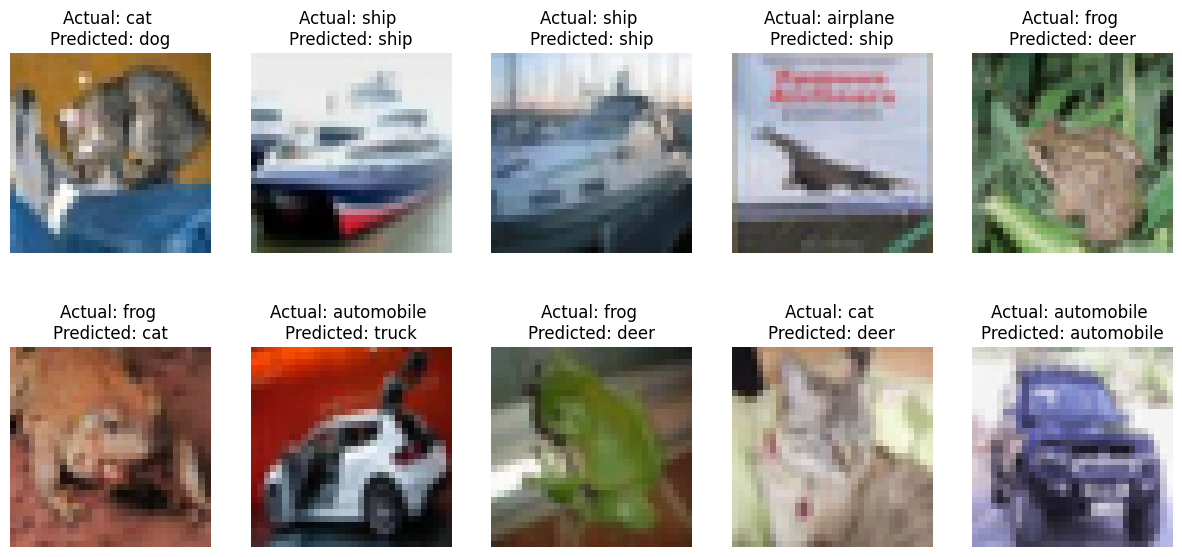

In [17]:
# Display the first 10 adversarial examples along with their actual and predicted labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
    # Display the adversarial image.
    ax[i].imshow(image)

    # Show actual and predicted labels.
    prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
    ax[i].set_title(f"Actual: {class_name[label.argmax()]} \nPredicted: {class_name[prediction]}", fontsize=12)
    ax[i].axis('off')

### Evaluate the Model on Adversarial Test Data

In [18]:
# Evaluate model performance on adversarial examples.
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)

# Calculate the average perturbation introduced by the adversarial attack.
perturbation = np.mean(np.abs(x_test_adv - x_test))

# Print evaluation results.
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5625 - loss: 2.6583

2025-08-26 18:14:13.168647: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[4,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 18:14:13.182919: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[4,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForwa

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.6300 - loss: 1.6156
Accuracy on adversarial test data: 63.00%
Average perturbation: 0.00


###  Carlini and Wagner L_2 Attack

> class art.attacks.evasion.CarliniL2Method(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, binary_search_steps: int = 10, max_iter: int = 10, initial_const: float = 0.01, max_halving: int = 5, max_doubling: int = 5, batch_size: int = 1, verbose: bool = True)

The L_2 optimized attack of Carlini and Wagner (2016). This attack is among the most effective and should be used among the primary attacks to evaluate potential defences. A major difference wrt to the original implementation (https://github.com/carlini/nn_robust_attacks) is that we use line search in the optimization of the attack objective.
* Paper link: https://arxiv.org/abs/1608.04644

*\_\_init__(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, binary_search_steps: int = 10, max_iter: int = 10, initial_const: float = 0.01, max_halving: int = 5, max_doubling: int = 5, batch_size: int = 1, verbose: bool = True) → None*

**Create a Carlini&Wagner L_2 attack instance.**

    Parameters:
* classifier – A trained classifier.
* confidence (float) – Confidence of adversarial examples: a higher value produces examples that are farther away, from the original input, but classified with higher confidence as the target class.
* targeted (bool) – Should the attack target one specific class.
* learning_rate (float) – The initial learning rate for the attack algorithm. Smaller values produce better results but are slower to converge.
* binary_search_steps (int) – Number of times to adjust constant with binary search (positive value). If binary_search_steps is large, then the algorithm is not very sensitive to the value of initial_const. Note that the values gamma=0.999999 and c_upper=10e10 are hardcoded with the same values used by the authors of the method.
* max_iter (int) – The maximum number of iterations.
* initial_const (float) – The initial trade-off constant c to use to tune the relative importance of distance and confidence. If binary_search_steps is large, the initial constant is not important, as discussed in Carlini and Wagner (2016).
* max_halving (int) – Maximum number of halving steps in the line search optimization.
* max_doubling (int) – Maximum number of doubling steps in the line search optimization.
* batch_size (int) – Size of the batch on which adversarial samples are generated.
* verbose (bool) – Show progress bars.

    
**generate(x: ndarray, y: ndarray | None = None, \*\*kwargs) → ndarray**

Generate adversarial samples and return them in an array.

    Return type:
* ndarray
    
    
    Parameters:
* x (ndarray) – An array with the original inputs to be attacked.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,). If self.targeted is true, then y represents the target labels. If self.targeted is true, then y_val represents the target labels. Otherwise, the targets are the original class labels.

    
    Returns:
* An array holding the adversarial examples.

Link: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#carlini-and-wagner-l-2-attack



### Create a ART Carlini&Wagner Infinity-norm attack.

In [19]:
attack_cw_l2 = CarliniL2Method(classifier=classifier,
                              max_iter=100,
                              learning_rate=0.01,
                              initial_const=1e0,
                              batch_size = 64
                              )

### Generate adversarial test data.

In [20]:
# Generate adversarial examples from the reduced test set using the C&W L2 attack.
x_test_adv = attack_cw_l0.generate(x_test)

### Save or Load C&W L2 Generated Adversarial Test Data

In [21]:
# Option 1: Save your newly generated adversarial test data (uncomment to use).
cw_l2_data_path = 'cw_l2_poison_data_cifar10_test_S100.npz'
np.savez(cw_l2_data_path,
         x_test_adv=x_test_adv, y_test_adv=y_test)

# Option 2: Load previously saved adversarial test data (recommended for reuse or quick experiments).
# Download the data file from GitHub raw URL
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/data/cw_l2_poison_data_cifar10_test_S500.npz

# x_test_data = np.load(cw_l2_data_path)
# x_test_adv, y_test = x_test_data['x_test_adv'], x_test_data['y_test_adv']
# x_test_adv.shape, y_test.shape

### Visualise the first adversarial test sample.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


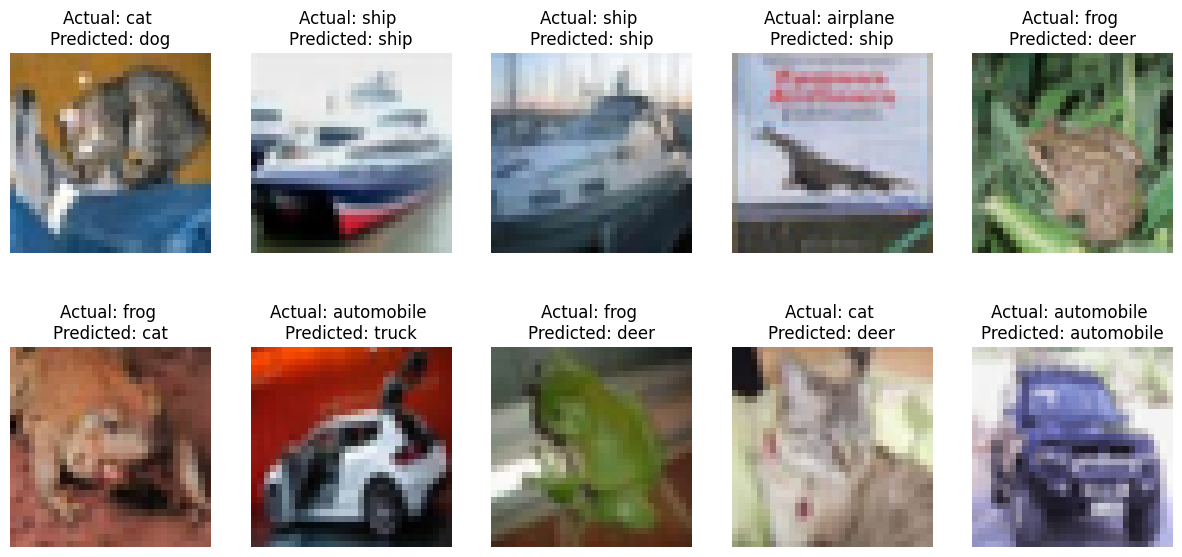

In [22]:
# Display the first 10 adversarial examples along with their actual and predicted labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
    # Display the adversarial image.
    ax[i].imshow(image)

    # Show actual and predicted labels.
    prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
    ax[i].set_title(f"Actual: {class_name[label.argmax()]} \nPredicted: {class_name[prediction]}", fontsize=12)
    ax[i].axis('off')

### Evaluate the Model on Adversarial Test Data

In [23]:
# Evaluate model performance on adversarial examples.
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)

# Calculate the average perturbation introduced by the adversarial attack.
perturbation = np.mean(np.abs(x_test_adv - x_test))

# Print evaluation results.
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6300 - loss: 1.7922 
Accuracy on adversarial test data: 63.00%
Average perturbation: 0.00


### Carlini&Wagner Infinity-norm attack

> class art.attacks.evasion.CarliniLInfMethod(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, decrease_factor: float = 0.9, initial_const: float = 1e-05, largest_const: float = 20.0, const_factor: float = 2.0, batch_size: int = 1, verbose: bool = True)

This is a modified version of the L_2 optimized attack of Carlini and Wagner (2016). It controls the L_Inf norm, i.e. the maximum perturbation applied to each pixel.

*\_\_init__(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, decrease_factor: float = 0.9, initial_const: float = 1e-05, largest_const: float = 20.0, const_factor: float = 2.0, batch_size: int = 1, verbose: bool = True) → None*

**Create a Carlini&Wagner L_Inf attack instance.**

    Parameters:
* classifier – A trained classifier.
* confidence (float) – Confidence of adversarial examples: a higher value produces examples that are farther away, from the original input, but classified with higher confidence as the target class.
* targeted (bool) – Should the attack target one specific class.
* learning_rate (float) – The initial learning rate for the attack algorithm. Smaller values produce better results but are slower to converge.
* max_iter (int) – The maximum number of iterations.
* decrease_factor (float) – The rate of shrinking tau, values in 0 < decrease_factor < 1 where larger is more accurate.
* initial_const (float) – The initial value of constant c.
* largest_const (float) – The largest value of constant c.
* const_factor (float) – The rate of increasing constant c with const_factor > 1, where smaller more accurate.
* batch_size (int) – Size of the batch on which adversarial samples are generated.
* verbose (bool) – Show progress bars.

**generate(x: ndarray, y: ndarray | None = None, \*\*kwargs) → ndarray**

Generate adversarial samples and return them in an array.

    Return type:
* ndarray
    
    
    Parameters:
* x (ndarray) – An array with the original inputs to be attacked.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,). If self.targeted is true, then y_val represents the target labels. Otherwise, the targets are the original class labels.

    
    Returns:
* An array holding the adversarial examples.

Link: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#carlini-and-wagner-l-inf-attack



### Create a ART Carlini&Wagner Infinity-norm attack.

In [24]:
attack_cw_inf = CarliniLInfMethod(classifier=classifier,
                              max_iter=100,
                              learning_rate=0.01,
                              initial_const=1e0,
                              largest_const=2e0, 
                              batch_size = 64)

### Generate adversarial test data.

In [25]:
# Generate adversarial examples from the reduced test set using the C&W linf attack.
x_test_adv = attack_cw_inf.generate(x_test)

C&W L_inf: 100%|██████████| 100/100 [6:20:07<00:00, 228.07s/it]  


### Save or Load C&W Linf Generated Adversarial Test Data

In [26]:
# Option 1: Save your newly generated adversarial test data (uncomment to use).
cw_linf_data_path = 'cw_linf_poison_data_cifar10_test_S100.npz'
np.savez(cw_linf_data_path,
         x_test_adv=x_test_adv, y_test_adv=y_test)

# Option 2: Load previously saved adversarial test data (recommended for reuse or quick experiments).
# Download the data file from GitHub raw URL
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/data/cw_linf_poison_data_cifar10_test_S500.npz

# x_test_data = np.load(cw_linf_data_path)
# x_test_adv, y_test = x_test_data['x_test_adv'], x_test_data['y_test_adv']
# x_test_adv.shape, y_test.shape

### Visualise the first adversarial test sample.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


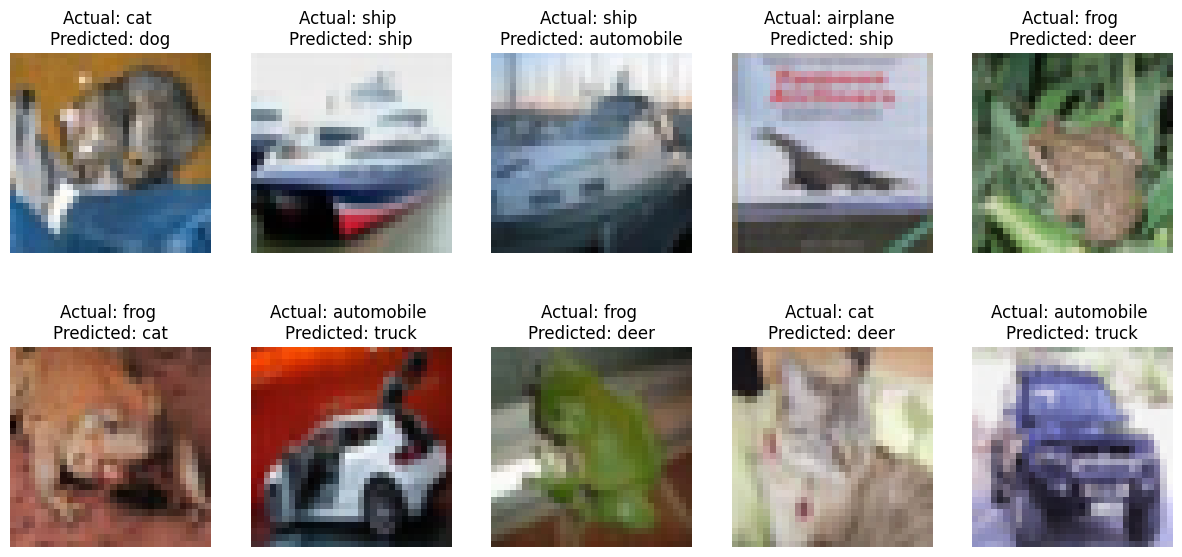

In [27]:
# Display the first 10 adversarial examples along with their actual and predicted labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
    # Display the adversarial image.
    ax[i].imshow(image)

    # Show actual and predicted labels.
    prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
    ax[i].set_title(f"Actual: {class_name[label.argmax()]} \nPredicted: {class_name[prediction]}", fontsize=12)
    ax[i].axis('off')

### Evaluate the Model on Adversarial Test Data

In [28]:
# Evaluate model performance on adversarial examples.
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)

# Calculate the average perturbation introduced by the adversarial attack.
perturbation = np.mean(np.abs(x_test_adv - x_test))

# Print evaluation results.
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4700 - loss: 2.6733
Accuracy on adversarial test data: 47.00%
Average perturbation: 0.00


## Summary of Carlini and Wagner Attack Implementation on a Dataset
#### **Overview**

I have implemented the Carlini and Wagner (C&W) attack on a dataset comprising images from multiple classes. The C&W attack is a sophisticated adversarial attack method designed to evaluate and challenge the robustness of machine learning models, particularly deep neural networks. This summary explains the workings of the C&W attack, its implementation, and the impact of various parameters on the effectiveness of the attack.

#### **C&W Attack Mechanism**

The Carlini and Wagner attack is an optimization-based adversarial attack that aims to find minimal perturbations necessary to mislead the model while ensuring the perturbed images remain visually similar to the original ones. The attack minimizes the perturbation subject to the constraint that the perturbed image is misclassified by the model. The key steps in the C&W attack are:

1. Objective Function: Define an objective function that combines the goal of minimizing the perturbation with the goal of misclassifying the input. The C&W attack typically uses the following objective function:
    min⁡∥δ∥p+c⋅f(x+δ)
    min∥δ∥p​+c⋅f(x+δ)

2. where δδ is the perturbation, ∥δ∥p∥δ∥p​ is the p-norm of the perturbation, cc is a constant balancing the two objectives, and ff is a function that measures the success of the attack (i.e., whether the perturbed image x+δx+δ is misclassified).

3. Optimization: Use a gradient-based optimization method to solve the above objective function. The optimization aims to find the smallest perturbation δδ that misleads the model.

4. Perturbation Bound: Ensure the perturbation δδ remains within a specified range to maintain the visual similarity between the original and perturbed images.

#### **Impact of Parameters**

The success and subtlety of the C&W attack are influenced by several parameters:

* Norm (p-norm): The choice of norm (typically L2L2​ or L∞L∞​) affects the nature of the perturbation. The L2L2​ norm aims for minimal overall change, while the L∞L∞​ norm limits the maximum change to any single pixel.
* Constant cc: This parameter balances the trade-off between minimizing the perturbation and ensuring successful misclassification. A larger cc emphasizes misclassification, potentially leading to larger perturbations.
* Optimization Parameters: Learning rate, number of iterations, and other optimization settings can impact the efficiency and effectiveness of the attack.

#### **Results and Observations**

The implementation of the C&W attack on the dataset demonstrated the following:

* Small Perturbations: The C&W attack is effective in generating adversarial examples with minimal perceptual changes. Even small perturbations can significantly decrease the model's accuracy.
* Parameter Sensitivity: The success of the attack is highly sensitive to the choice of parameters. Fine-tuning cc and the norm used is crucial for balancing attack success and perturbation visibility.
* Model Robustness: The attack reveals vulnerabilities in the model, highlighting the need for improved robustness and adversarial training.

#### **Conclusion**

The Carlini and Wagner attack showcases the vulnerability of machine learning models to carefully crafted adversarial examples. By optimizing perturbations to be minimal yet effective, the C&W attack challenges the robustness of neural networks. Understanding and mitigating such attacks are essential for developing resilient models. Experimenting with different parameters provides insights into the trade-offs between attack success and perturbation subtlety, guiding the development of more secure machine learning systems.